<a href="https://colab.research.google.com/github/marufa181/CERTIFICATE/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


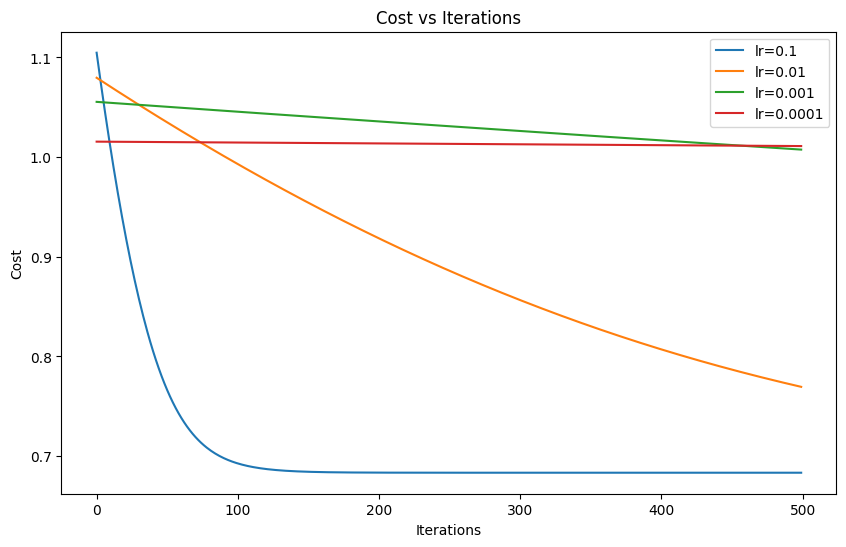

Learning Rate vs Test Accuracy
--------------------------------
Learning Rate: 0.1, Test Accuracy: 42.50%
Learning Rate: 0.01, Test Accuracy: 47.50%
Learning Rate: 0.001, Test Accuracy: 45.00%
Learning Rate: 0.0001, Test Accuracy: 51.00%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Placeholder for loading your dataset. Replace 'your_dataset.csv' with the actual dataset file.
data = pd.read_csv("dataset.csv")

# Dataset Preparation
def prepare_data(data):
    # Drop unnecessary columns (e.g., CustomerID)
    data = data.drop(columns=['CustomerID'], errors='ignore')

    # Separate features and target
    X = data.iloc[:, :-1].values  # Features (assumes target is last column)
    y = data.iloc[:, -1].values   # Target

    # Normalize the features
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Add bias term (column of ones)
    X = np.hstack((X, np.ones((X.shape[0], 1))))

    return X, y

X, y = prepare_data(data)

# Split into training and test sets
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_idx = int((1 - test_size) * len(indices))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Training
def train_logistic_regression(X_train, y_train, lr=0.01, max_iter=500):
    n_samples, n_features = X_train.shape
    theta = np.random.uniform(0, 1, n_features)  # Initialize weights and bias
    history = []

    for _ in range(max_iter):
        z = np.dot(X_train, theta)  # Linear combination
        h = sigmoid(z)             # Prediction using sigmoid

        # Compute loss (log-loss)
        loss = -np.mean(y_train * np.log(h) + (1 - y_train) * np.log(1 - h))
        history.append(loss)

        # Compute gradients
        gradient = np.dot(X_train.T, (h - y_train)) / n_samples

        # Update weights
        theta -= lr * gradient

    return theta, history

# Training with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    theta, history = train_logistic_regression(X_train, y_train, lr=lr)
    results[lr] = {
        'theta': theta,
        'history': history
    }

# Plot cost vs. iterations
plt.figure(figsize=(10, 6))
for lr, result in results.items():
    plt.plot(result['history'], label=f'lr={lr}')

plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Test the model
def test_logistic_regression(X_test, y_test, theta):
    z = np.dot(X_test, theta)
    h = sigmoid(z)
    predictions = (h >= 0.5).astype(int)
    accuracy = np.mean(predictions == y_test) * 100
    return accuracy

# Evaluate each model on the test set
test_accuracies = {}
for lr, result in results.items():
    accuracy = test_logistic_regression(X_test, y_test, result['theta'])
    test_accuracies[lr] = accuracy

# Print test accuracies
print("Learning Rate vs Test Accuracy")
print("--------------------------------")
for lr, acc in test_accuracies.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.2f}%")


# 2nd

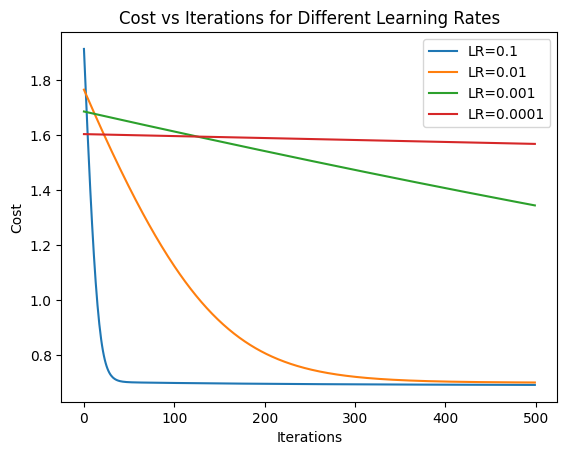

Learning Rate  Test Accuracy (%)   
0.1            51.50               
0.01           50.00               
0.001          48.50               
0.0001         48.50               


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace this with actual dataset loading code)
data = np.random.rand(1000, 12)  # Example dataset (replace)
columns = ['CustomerID'] + [f'Feature{i}' for i in range(1, 11)] + ['Churn']
data[:, -1] = np.random.randint(0, 2, size=data.shape[0])  # Binary target variable

# Prepare the dataset
def normalize(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

features = data[:, 1:-1]
labels = data[:, -1]
features = normalize(features)

# Split into training and test sets
np.random.seed(42)
indices = np.random.permutation(features.shape[0])
split_idx = int(0.8 * len(indices))
train_idx, test_idx = indices[:split_idx], indices[split_idx:]
X_train, X_test = features[train_idx], features[test_idx]
y_train, y_test = labels[train_idx], labels[test_idx]

# Add bias term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training
def train_logistic_regression(X_train, y_train, learning_rate, max_iter):
    n_samples, n_features = X_train.shape
    theta = np.random.rand(n_features)  # Initialize weights and bias
    history = []

    for itr in range(max_iter):
        cost = 0
        gradient = np.zeros(n_features)

        for i in range(n_samples):
            z = np.dot(X_train[i], theta)
            h = sigmoid(z)
            cost += -(y_train[i] * np.log(h) + (1 - y_train[i]) * np.log(1 - h))
            gradient += (h - y_train[i]) * X_train[i]

        cost /= n_samples
        gradient /= n_samples
        theta -= learning_rate * gradient

        history.append(cost)

    return theta, history

# Validate model
def validate_logistic_regression(X_test, y_test, theta):
    correct = 0
    for i in range(X_test.shape[0]):
        z = np.dot(X_test[i], theta)
        h = sigmoid(z)
        h = 1 if h >= 0.5 else 0
        if h == y_test[i]:
            correct += 1
    test_accuracy = correct * 100 / len(y_test)
    return test_accuracy

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
max_iter = 500
results = []

for lr in learning_rates:
    theta, history = train_logistic_regression(X_train, y_train, lr, max_iter)
    test_accuracy = validate_logistic_regression(X_test, y_test, theta)
    results.append((lr, test_accuracy))

    plt.plot(range(max_iter), history, label=f'LR={lr}')

plt.title('Cost vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Display results
print(f"{'Learning Rate':<15}{'Test Accuracy (%)':<20}")
for lr, acc in results:
    print(f"{lr:<15}{acc:<20.2f}")


# 3rd


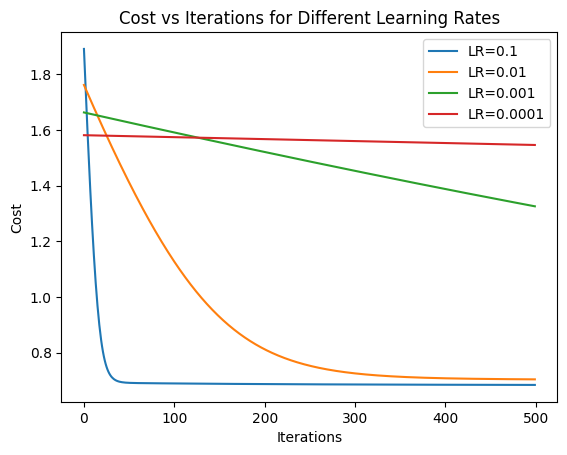

Learning Rate  Test Accuracy (%)   
0.1            48.00               
0.01           48.00               
0.001          49.00               
0.0001         49.00               


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("dataset.csv")

# Prepare the dataset
def normalize(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Extract features and labels
features = data.iloc[:, 1:-1].values  # Features from Feature1 to Feature10
labels = data.iloc[:, -1].values  # Churn column
features = normalize(features)

# Split into training and test sets
np.random.seed(42)
indices = np.random.permutation(features.shape[0])
split_idx = int(0.8 * len(indices))
train_idx, test_idx = indices[:split_idx], indices[split_idx:]
X_train, X_test = features[train_idx], features[test_idx]
y_train, y_test = labels[train_idx], labels[test_idx]

# Add bias term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training
def train_logistic_regression(X_train, y_train, learning_rate, max_iter):
    n_samples, n_features = X_train.shape
    theta = np.random.rand(n_features)  # Initialize weights and bias
    history = []

    for itr in range(max_iter):
        cost = 0
        gradient = np.zeros(n_features)

        for i in range(n_samples):
            z = np.dot(X_train[i], theta)
            h = sigmoid(z)
            cost += -(y_train[i] * np.log(h) + (1 - y_train[i]) * np.log(1 - h))
            gradient += (h - y_train[i]) * X_train[i]

        cost /= n_samples
        gradient /= n_samples
        theta -= learning_rate * gradient

        history.append(cost)

    return theta, history

# Validate model
def validate_logistic_regression(X_test, y_test, theta):
    correct = 0
    for i in range(X_test.shape[0]):
        z = np.dot(X_test[i], theta)
        h = sigmoid(z)
        h = 1 if h >= 0.5 else 0
        if h == y_test[i]:
            correct += 1
    test_accuracy = correct * 100 / len(y_test)
    return test_accuracy

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
max_iter = 500
results = []

for lr in learning_rates:
    theta, history = train_logistic_regression(X_train, y_train, lr, max_iter)
    test_accuracy = validate_logistic_regression(X_test, y_test, theta)
    results.append((lr, test_accuracy))

    plt.plot(range(max_iter), history, label=f'LR={lr}')

plt.title('Cost vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Display results
print(f"{'Learning Rate':<15}{'Test Accuracy (%)':<20}")
for lr, acc in results:
    print(f"{lr:<15}{acc:<20.2f}")


# Sir

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [5]:
data = pd.read_csv("dataset.csv")
data

,CustomerID,MonthlyCharges,TotalCharges,Tenure,InternetUsageHours,StreamingServicesCount,ContractLengthMonths,SupportTicketsResolved,PaymentFailures,DataOverages,AdditionalServicesCount,Churn
0,Q1EYDZW4,71.512033,92.613275,76.323002,25.346517,7.421963,6.077543,82.204000,46.437972,77.680846,90.986339,1
1,0XW1WPO6,69.076725,23.119030,30.873103,15.595253,86.698328,15.101719,28.917340,7.917692,81.719238,15.613594,0
2,87X54YY5,47.904683,98.107812,43.330109,41.542661,62.953714,50.024359,14.522983,24.417119,32.862927,35.423404,0
3,5QY6GMGV,39.616875,2.203960,97.280911,55.840969,69.543085,37.963706,50.140335,11.425159,76.980391,92.519095,0
4,XCV4ENE8,24.301590,63.601304,86.414844,91.554220,90.613161,28.127590,61.724203,60.906640,57.059570,3.755901,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,CY8QPOEA,29.954757,89.316789,59.559282,52.431473,75.043220,78.951805,51.659876,78.295186,67.004616,34.017308,0
996,2IHLYZRG,26.683802,66.686716,8.967006,43.153687,99.169367,41.555528,85.464515,20.881562,29.442058,63.551583,1
997,BPAQVDAX,55.764261,98.886617,27.222502,89.322716,58.370537,51.835918,82.855350,46.411222,49.431222,48.792006,0
998,2LS4RAZC,13.067393,5.015654,30.263503,67.103466,30.125967,74.354112,71.033468,13.127121,18.754188,62.476995,0


In [7]:
feature_cols = [
    "MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"
]
X = data[feature_cols]
y = data["Churn"]

In [9]:
X

,MonthlyCharges,TotalCharges,Tenure,InternetUsageHours,StreamingServicesCount,ContractLengthMonths,SupportTicketsResolved,PaymentFailures,DataOverages,AdditionalServicesCount
0,71.512033,92.613275,76.323002,25.346517,7.421963,6.077543,82.204000,46.437972,77.680846,90.986339
1,69.076725,23.119030,30.873103,15.595253,86.698328,15.101719,28.917340,7.917692,81.719238,15.613594
2,47.904683,98.107812,43.330109,41.542661,62.953714,50.024359,14.522983,24.417119,32.862927,35.423404
3,39.616875,2.203960,97.280911,55.840969,69.543085,37.963706,50.140335,11.425159,76.980391,92.519095
4,24.301590,63.601304,86.414844,91.554220,90.613161,28.127590,61.724203,60.906640,57.059570,3.755901
...,...,...,...,...,...,...,...,...,...,...
995,29.954757,89.316789,59.559282,52.431473,75.043220,78.951805,51.659876,78.295186,67.004616,34.017308
996,26.683802,66.686716,8.967006,43.153687,99.169367,41.555528,85.464515,20.881562,29.442058,63.551583
997,55.764261,98.886617,27.222502,89.322716,58.370537,51.835918,82.855350,46.411222,49.431222,48.792006
998,13.067393,5.015654,30.263503,67.103466,30.125967,74.354112,71.033468,13.127121,18.754188,62.476995


In [10]:
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.71534927, 0.92703954, 0.76411142, ..., 0.46413094, 0.777642  ,
        0.91334682],
       [0.6909825 , 0.23095195, 0.30828953, ..., 0.07870835, 0.81809023,
        0.15646724],
       [0.479143  , 0.98207545, 0.43322217, ..., 0.24379677, 0.32874915,
        0.35539379],
       ...,
       [0.55778298, 0.98987633, 0.27167727, ..., 0.4638633 , 0.49469592,
        0.4896389 ],
       [0.13057418, 0.04961987, 0.30217579, ..., 0.13083237, 0.1874371 ,
        0.6270611 ],
       [0.75737011, 0.07641137, 0.03494051, ..., 0.58831382, 0.22103626,
        0.7219697 ]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_test_pred = log_reg.predict(X_test)

In [15]:
#print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.47

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        96
           1       0.49      0.41      0.45       104

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

